## *Import Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 

In [2]:
warnings.filterwarnings('ignore')

## *Load Data*

In [3]:
df = pd.read_csv('../data/nissan_clear.csv')

## *Split Data*

In [4]:
X = df.drop(columns=['price'])
y = df.price

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [7]:
X_train,y_train = np.asarray(X_train),np.asarray(y_train)
X_test,y_test = np.asarray(X_test),np.asarray(y_test)

## *Linear Regression*

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression().fit(X_train,y_train)

## *Evaluation Model*

In [10]:
r2_train = lm.score(X_train,y_train)
r2_test = lm.score(X_test,y_test)
cv = cross_val_score(lm,X_test,y_test,cv =5).mean()

In [11]:
print(f'R2 Train : {r2_train}')
print(f'R2 Test :  {r2_test}')
print(f'CV: {cv}')

R2 Train : 0.8456867501133247
R2 Test :  0.8427621341728306
CV: 0.8409860259928259


In [12]:
lm.coef_

array([ 0.08356158,  0.0279559 , -0.0537063 , -0.00227146,  0.17595991,
        0.02959325,  0.07302352,  0.00219044,  0.3506946 , -0.21588287,
       -0.072432  , -0.06237974, -0.00891324,  0.11411547, -0.21588287,
        0.11477561,  0.22525086, -0.22934582, -0.00355402, -0.01251762,
       -0.00224928,  0.08362227,  0.00966866, -0.03212486, -0.00923457,
       -0.12632728,  0.02502868, -0.01702423, -0.01450135,  0.09921361])

In [13]:
lm.intercept_

-159.1788142343579

In [14]:
X.shape[1]

30

In [15]:
columns = X.columns
columns = [column.strip(' ') for column in columns]
columns = np.array(columns)

## *New Predictions*

In [16]:
columns = X.columns
columns = [column.strip(' ') for column in columns]
columns = np.array(columns)

def predict(year,condition,cyl,odometer,title_status,transmission,engine_size,hp,fuel,type_body,color):
    zeros = np.zeros(len(columns))
    condition_dict = {'acceptable':0,'good':1,'excellent':2,'like new':3}
    title_status_dict = {'parts only':0,'lien':1,'rebuilt':2,'clean':3}
    
    zeros[0] = year
    zeros[1] = condition_dict[condition]
    zeros[2] = cyl
    zeros[3] = np.sqrt(odometer)
    zeros[4] = title_status_dict[title_status]
    zeros[5] = np.where(transmission=="automatic",1,0)
    zeros[6] = engine_size
    zeros[7] = hp
    
    fuel_idx = np.where(columns==fuel)[0][0]
    type_body_idx = np.where(columns==type_body)[0][0]
    color_idx = np.where(columns==color)[0][0]
    
    if fuel_idx>=0:
        zeros[fuel_idx] = 1
        
    if type_body_idx>=0:
        zeros[type_body_idx] = 1
        
    if color_idx>=0:
        zeros[color_idx] = 1
        
    zeros = np.asarray([zeros])
        
    pred = lm.predict(zeros)
    pred = np.round(np.exp(pred),2)
    pred = np.int32(pred)

        
    return print(f'Price Estimated USD: $ {pred}')

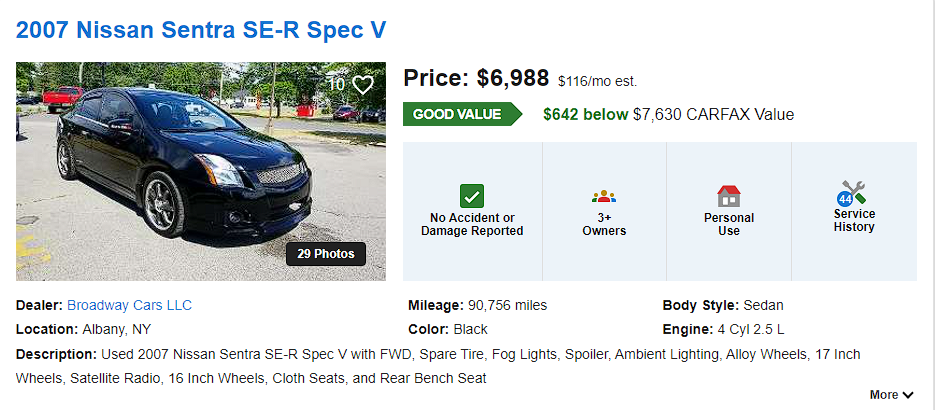

In [17]:
predict(2007,'excellent',4,90756,'clean','manual',2.5,200,'gas','sedan','black')

Price Estimated USD: $ [5060]


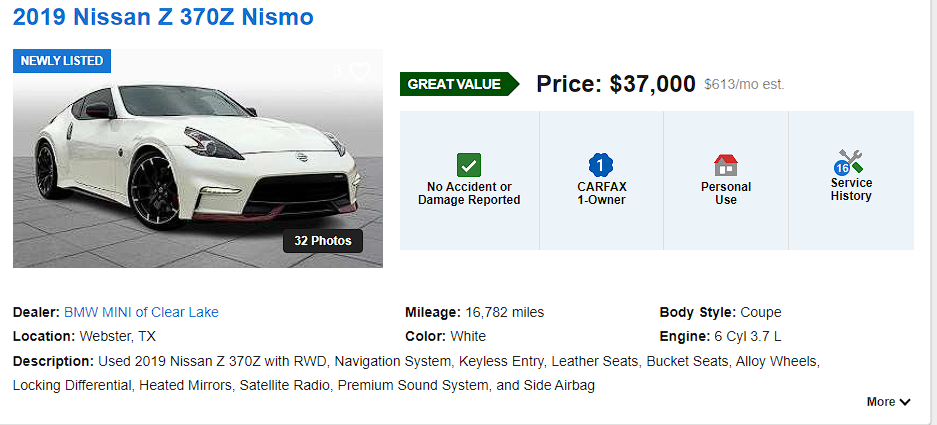

In [18]:
predict(2019,'like new',6,16782,'clean','manual',3.7,350,'gas','coupe','white')

Price Estimated USD: $ [39786]


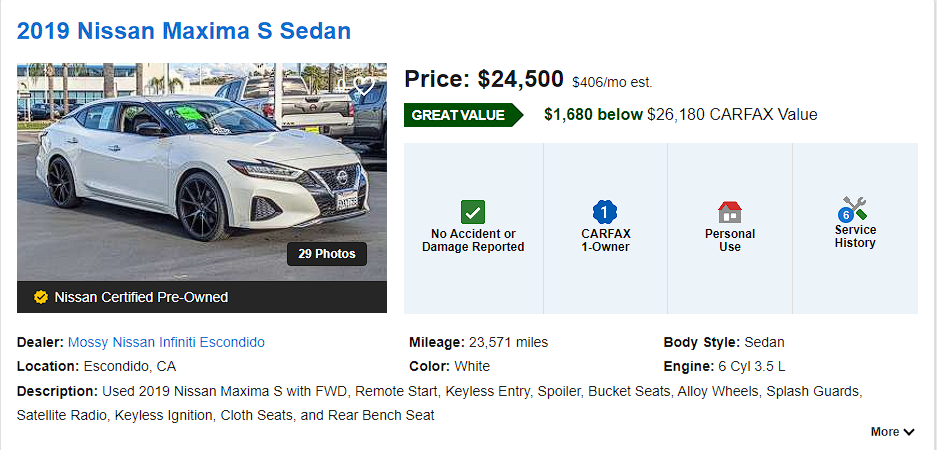

In [19]:
predict(2019,'like new',6,23571,'clean','automatic',3.5,300,'gas','sedan','white')

Price Estimated USD: $ [24314]


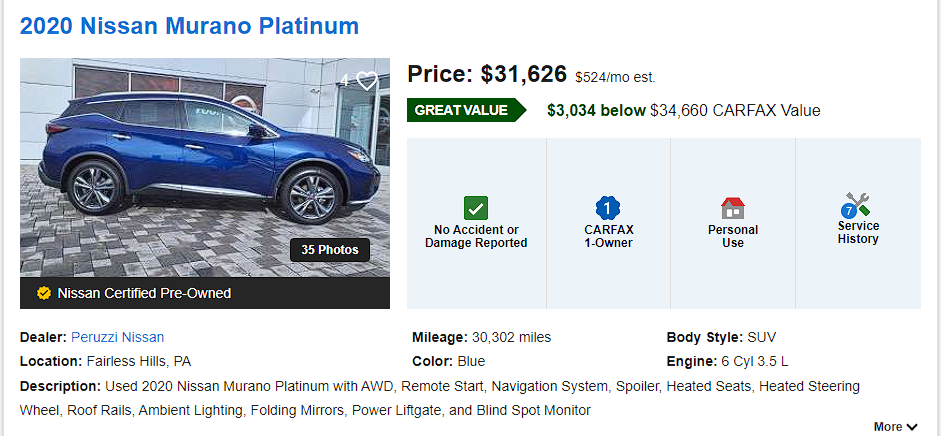

In [20]:
predict(2020,'like new',6,30302,'clean','automatic',3.5,260,'gas','SUV','blue')

Price Estimated USD: $ [28868]


## *Save Model*

In [21]:
import joblib

In [22]:
joblib.dump(lm,'../model/model.pkl')

['../model/model.pkl']